<a href="https://colab.research.google.com/github/arnavkundalia/Sports-Feed/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
# from google.colab import files
# uploaded = files.upload()

In [245]:
data = pd.read_csv("all_matches.csv")
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(213391, 22)

In [246]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
data.drop(columns=['non_striker','other_wicket_type','other_player_dismissed', 'player_dismissed'],axis =1, inplace=True)

In [248]:
old = ['Arun Jaitley Stadium, Delhi','Brabourne Stadium, Mumbai','Dr DY Patil Sports Academy, Mumbai','M.Chinnaswamy Stadium','MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennai','Maharashtra Cricket Association Stadium, Pune','Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali','Rajiv Gandhi International Stadium','Wankhede Stadium, Mumbai']
new= ['Arun Jaitley Stadium','Brabourne Stadium','Dr DY Patil Sports Academy','M Chinnaswamy Stadium','MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk','Maharashtra Cricket Association Stadium','Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium, Mohali','Rajiv Gandhi International Stadium, Uppal','Wankhede Stadium']
data['venue'].replace(old,new,inplace=True)

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213391 entries, 0 to 213390
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   match_id      213391 non-null  int64  
 1   season        213391 non-null  object 
 2   start_date    213391 non-null  object 
 3   venue         213391 non-null  object 
 4   innings       213391 non-null  int64  
 5   ball          213391 non-null  float64
 6   batting_team  213391 non-null  object 
 7   bowling_team  213391 non-null  object 
 8   striker       213391 non-null  object 
 9   bowler        213391 non-null  object 
 10  runs_off_bat  213391 non-null  int64  
 11  extras        213391 non-null  int64  
 12  wides         6518 non-null    float64
 13  noballs       878 non-null     float64
 14  byes          557 non-null     float64
 15  legbyes       3364 non-null    float64
 16  penalty       2 non-null       float64
 17  wicket_type   10505 non-null   object 
dtypes: f

In [250]:
data.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,2.133910e+05,213391.000000,213391.000000,213391.000000,213391.000000,6518.000000,878.000000,557.000000,3364.000000,2.0
mean,8.042191e+05,1.483868,9.541854,1.241533,0.066427,1.203743,1.039863,1.849192,1.300832,5.0
std,3.271221e+05,0.503301,5.682883,1.613585,0.339514,0.784559,0.350281,1.301170,0.840818,0.0
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.012480e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,7.340310e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.136601e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.304068e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


In [251]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,season,start_date,venue,batting_team,bowling_team,striker,bowler,wicket_type
0,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,NaN
1,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
2,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
3,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
4,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN


In [252]:
data.isnull().sum()

match_id             0
season               0
start_date           0
venue                0
innings              0
ball                 0
batting_team         0
bowling_team         0
striker              0
bowler               0
runs_off_bat         0
extras               0
wides           206873
noballs         212513
byes            212834
legbyes         210027
penalty         213389
wicket_type     202886
dtype: int64

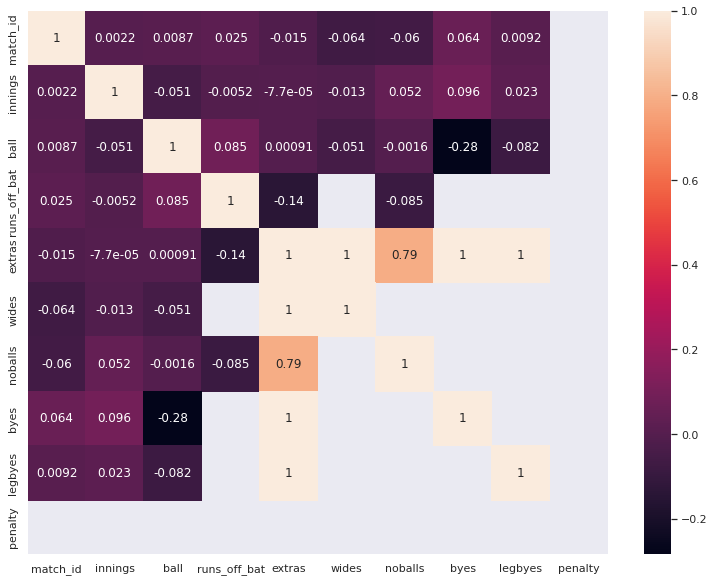

In [253]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)

In [254]:
data.groupby('venue')['runs_off_bat'].count()

venue
Arun Jaitley Stadium                                    4344
Barabati Stadium                                        1695
Brabourne Stadium                                       3948
Buffalo Park                                             715
De Beers Diamond Oval                                    726
Dr DY Patil Sports Academy                              5968
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     3037
Dubai International Cricket Stadium                    11229
Eden Gardens                                           17988
Feroz Shah Kotla                                       13950
Green Park                                               921
Himachal Pradesh Cricket Association Stadium            2159
Holkar Cricket Stadium                                  1965
JSCA International Stadium Complex                      1671
Kingsmead                                               3643
M Chinnaswamy Stadium                                  18401
MA Chidambaram Sta

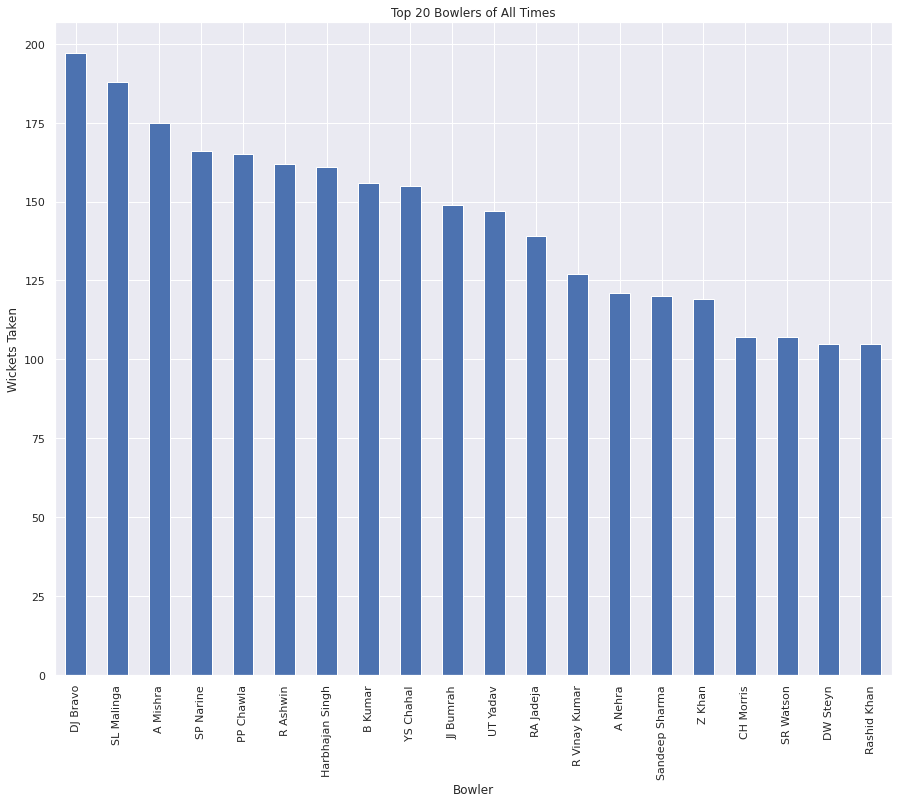

In [280]:
bowler = data.groupby('bowler')['wicket_type'].count().nlargest(20)
bowler.plot(kind= "bar", ylabel="Wickets Taken", xlabel= "Bowler", figsize = (15,12), title = "Top 20 Bowlers of All Times")

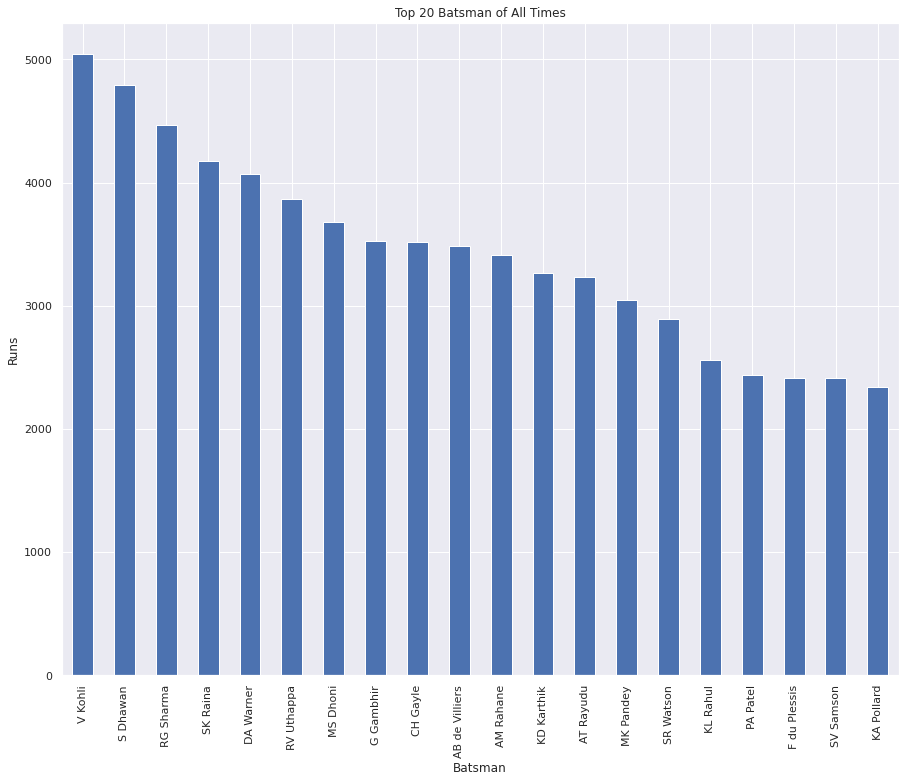

In [292]:
batsman = data.groupby('striker')['runs_off_bat'].count().nlargest(20)
batsman.plot(kind= "bar", ylabel="Runs", xlabel= "Batsman", figsize = (15,12), title = "Top 20 Batsman of All Times")

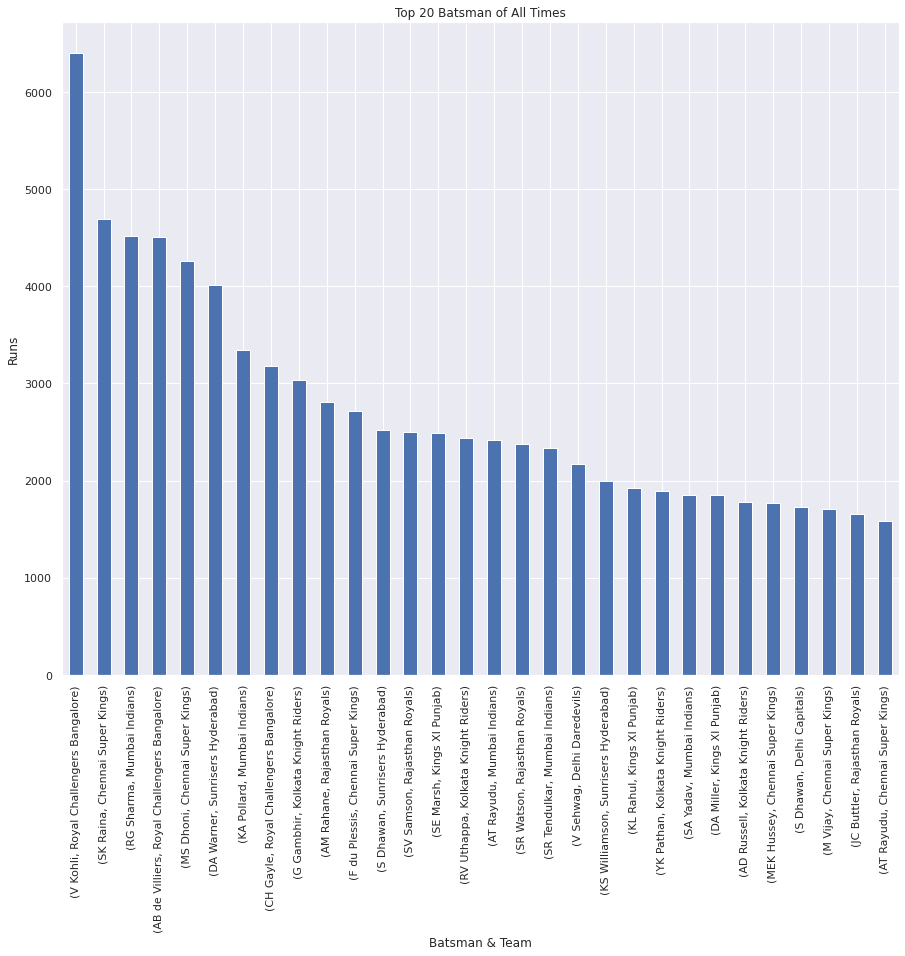

In [323]:
teams = data.groupby(['striker','batting_team'])['runs_off_bat'].sum().nlargest(30)
# teams = teams.iloc[0:0]
teams.plot(kind = "bar", ylabel="Runs", xlabel= "Batsman & Team", figsize = (15,12), title = "Top 20 Batsman of All Times")
# teams = teams.loc[:,'Royal Challengers Bangalore']
